In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler,LabelBinarizer,LabelEncoder


In [2]:
x_train=[]
x_label=[]

In [3]:
#had to use 2 or 3 since with 0/1 was confusing (accuracy was ok, 
#but label predict did not macth!),
#then needed to use label encode to make 0/1
#I think the problem was the first label was one and second label was 0
#so basically it is possible since data had first instance as 1 in real data, class of first instance was 0
#that's why for label real at 1, get probability of e.g. [0.8,0.2] since 1 come before 0 in real class 1 is assigned to that
#guessing
#if label set to 1 then 0, if encode it (become 0 then 1, the model get the encoders right with argmax

# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
#(e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that
#is all-zeros except for a 1 at the index corresponding to the class of the sample). 
#In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical:

# from keras.utils.np_utils import to_categorical  make it one hot code

# categorical_labels = to_categorical(int_labels, num_classes=None)

# from keras.utils.np_utils import to_categorical  make it one hot code

# Use 'softmax' and 'categorical_crossentropy' instead of 'sigmoid' and 'binary_crossentropy'.
# By using the latter two, you're treating the problem as a multilabel problem, not a multiclass problem.

for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    x_train.append(random_younger)
    x_label.append(2)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    x_train.append(random_older)
    x_label.append(3)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    x_train.append(random_younger)
    x_label.append(2)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    x_train.append(random_older)
    x_label.append(3)

In [4]:
x_label[0:15]

[2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2]

In [5]:
#1050 young 13<<65yr ,50 side effect  1000 ok
#1050 old 50 65< <100 yrs, side effect   1000 ok 

In [6]:
# x_young=np.random.randint(13,65,size=1000)
# label_young=np.random.randint(0,1,size=1000)

In [7]:
# x_old=np.random.randint(65,100,size=1000)
# label_old=np.random.randint(0,1,size=1000)

In [8]:
# x_young2=np.random.randint(13,65,size=50)
# label_young2=np.random.randint(1,2,size=50)
# x_old2=np.random.randint(65,100,size=50)
# label_old2=np.random.randint(1,2,size=50)

In [9]:
# x_train=np.concatenate((x_young,x_young2,x_old,x_old2),axis=0)

In [10]:
# x_label=np.concatenate((label_young,label_young2,label_old,label_old2),axis=0)

In [11]:
len(x_label)

2100

In [12]:
x_label[0:15]

[2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2]

In [13]:
x_train=np.array(x_train)
x_label=np.array(x_label)

In [14]:
x_label.max()

3

In [15]:
x_train

array([35, 98, 25, ..., 76, 36, 69])

In [16]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaler2=LabelEncoder() #to make 0/1

In [17]:
x_train.shape

(2100,)

In [18]:
x_label.shape

(2100,)

In [19]:
# x_train=x_train.reshape(2100,1)
# x_label=x_label.reshape(2100,1)

In [20]:
x_train.shape

(2100,)

In [21]:
scaled_xtrain=scaler.fit_transform((x_train).reshape(-1,1)) #this to make 2100,1
scaled_x_label=scaler2.fit_transform((x_label)) #will do 2100,1 later

/home/ania/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
scaled_xtrain

array([[0.25287356],
       [0.97701149],
       [0.13793103],
       ...,
       [0.72413793],
       [0.26436782],
       [0.64367816]])

In [23]:
scaled_x_label

array([0, 1, 0, ..., 1, 0, 1])

In [24]:
# scaled_x_label=scaled_x_label.reshape(2100,1)

In [25]:
x_label.shape

(2100,)

In [26]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.layers import activations
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

/home/ania/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [27]:
# scaled_x_label=keras.utils.to_categorical(x_label,num_classes=2) #was not working with number 2/3

In [27]:
#either use softmax two class and sparse_categorical cross entropy since it is not one hot coded 
#or use 1 class at end and use sigmoid but with binary cross entropy, similar results
model=Sequential([
    Dense(16,input_shape=(1,),activation='relu'),   
    # now the model will take as input arrays of shape (*, 1)
    # and output arrays of shape (*, 16)
    Dense(32,activation='relu'),
    # and output arrays of shape (*, 16)
    Dense(2,activation='softmax')
    # and output arrays of shape (*, 2) 
])


# model=Sequential([
#     Dense(16,input_shape=(1,),activation='relu'),   
#     # now the model will take as input arrays of shape (*, 1)
#     # and output arrays of shape (*, 16)
#     Dense(32,activation='relu'),
#     # and output arrays of shape (*, 16)
#     Dense(1,activation='sigmoid')
#     # and output arrays of shape (*, 2) 
# ])

In [28]:
model.summary()   #16*1+16, 16*32+32,32*2+2 paramter number

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#is using sparse categorical cross_entropy since the labels are 0 and 1 but not onehot coded, 
#if onehot coded use categorical cross entropy


In [30]:
model.fit(scaled_xtrain,scaled_x_label,batch_size=10,epochs=20,validation_split=0.1,shuffle=True,verbose=2)
#instead of validation_split, can creat a set for validation, validation_data=validation_set

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.5607 - acc: 0.7079 - val_loss: 0.4031 - val_acc: 0.8714
Epoch 2/20
 - 0s - loss: 0.2558 - acc: 0.9370 - val_loss: 0.1387 - val_acc: 0.9857
Epoch 3/20
 - 0s - loss: 0.1152 - acc: 0.9799 - val_loss: 0.0784 - val_acc: 1.0000
Epoch 4/20
 - 0s - loss: 0.0781 - acc: 0.9889 - val_loss: 0.0548 - val_acc: 0.9905
Epoch 5/20
 - 0s - loss: 0.0624 - acc: 0.9910 - val_loss: 0.0445 - val_acc: 0.9905
Epoch 6/20
 - 0s - loss: 0.0545 - acc: 0.9899 - val_loss: 0.0379 - val_acc: 0.9905
Epoch 7/20
 - 0s - loss: 0.0473 - acc: 0.9894 - val_loss: 0.0443 - val_acc: 0.9857
Epoch 8/20
 - 0s - loss: 0.0431 - acc: 0.9921 - val_loss: 0.0311 - val_acc: 1.0000
Epoch 9/20
 - 0s - loss: 0.0388 - acc: 0.9937 - val_loss: 0.0278 - val_acc: 1.0000
Epoch 10/20
 - 0s - loss: 0.0361 - acc: 0.9947 - val_loss: 0.0278 - val_acc: 1.0000
Epoch 11/20
 - 0s - loss: 0.0340 - acc: 0.9915 - val_loss: 0.0261 - val_acc: 0.9857
Epoch 12/20
 - 0s - loss: 0.0315 - acc

In [31]:
predict=model.predict(scaled_xtrain, batch_size=10, verbose=0) 

In [32]:
predict

array([[9.9999785e-01, 2.1161372e-06],
       [1.4160091e-09, 1.0000000e+00],
       [9.9999821e-01, 1.8181079e-06],
       ...,
       [4.4341115e-05, 9.9995565e-01],
       [9.9999785e-01, 2.1485025e-06],
       [5.6705051e-03, 9.9432951e-01]], dtype=float32)

In [33]:
predict_round=np.argmax(predict,axis=1)
#predict_round=predict.round()

In [35]:
#predict_round[:,0]
predict_round

array([0, 1, 0, ..., 1, 0, 1])

In [98]:
scaled_x_label

array([0, 1, 0, ..., 1, 0, 1])

In [37]:
np.mean(predict_round==scaled_x_label) #[:,0] to get numbers without arrays

0.9914285714285714

In [38]:
predict_round[0:15]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [39]:
scaled_x_label[0:15]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [48]:
import matplotlib.pyplot as plt

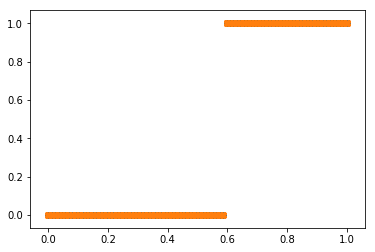

In [49]:
plt.scatter(scaled_xtrain,scaled_x_label,marker='o')
plt.scatter(scaled_xtrain,predict_round,marker='X')


# get test data

In [ ]:


for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    x_train.append(random_younger)
    x_label.append(2)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    x_train.append(random_older)
    x_label.append(3)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    x_train.append(random_younger)
    x_label.append(2)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    x_train.append(random_older)
    x_label.append(3)